In [47]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install lxml
!pip install pandas
!pip install numpy

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
import plotly.io as pio
pio.renderers.default = "iframe"
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [1]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

## Question 1: Use yfinance to Extract Stock Data


In [51]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")
# Extract Tesla stock history data for the maximum available period
tesla_data = tesla.history(period="max")

# Step 1: Reset the index
tesla_data.reset_index(inplace=True)

# Step 2: Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [ ]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, "html.parser")
tables = pd.read_html(str(soup)) 
tesla_revenue = tables[0]
tesla_revenue.columns = ['Date', 'Revenue']

print(tesla_revenue.tail())


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


C:\Users\KOVVO\AppData\Local\Temp\ipykernel_11408\51271770.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


## Question 3: Use yfinance to Extract Stock Data


In [7]:

# Create a ticker object for GameStop
gamestop = yf.Ticker("GME")
# Extract GameStop stock history data for the maximum available period
gme_data = gamestop.history(period="max")

# Step 1: Create the Ticker object for GameStop
gamestop = yf.Ticker("GME")

# Step 2: Extract GameStop stock history data for the maximum available period
gme_data = gamestop.history(period="max")

# Step 3: Reset the index
gme_data.reset_index(inplace=True)

# Step 4: Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


In [8]:


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")
soup = BeautifulSoup(html_data_2, "html.parser")
tables = pd.read_html(str(soup))
gme_revenue = tables[0]
gme_revenue.columns = ['Date', 'Revenue']

print(gme_revenue.tail())



    Date Revenue
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


C:\Users\KOVVO\AppData\Local\Temp\ipykernel_11408\3895280399.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


## Question 5: Plot Tesla Stock Graph


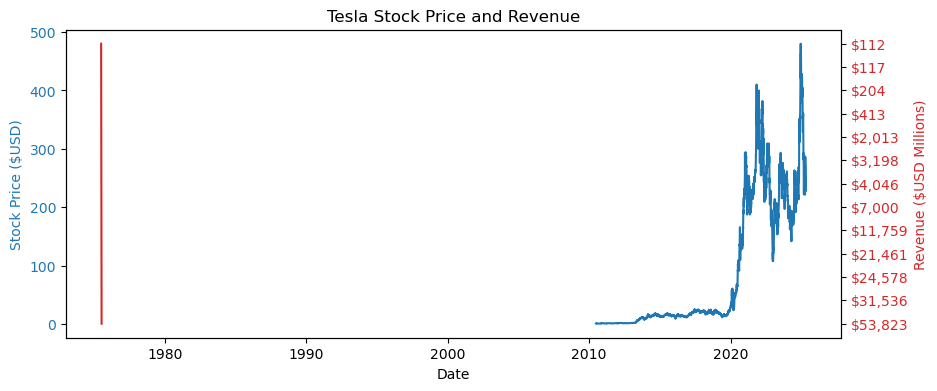

In [60]:
def make_graph(stock_data, revenue_data, stock_name):
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax1.plot(stock_data.Date, stock_data.Close, color="tab:blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($USD)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    plt.title(f"{stock_name} Stock Price and Revenue")
    ax2 = ax1.twinx()
    ax2.plot(revenue_data.Date, revenue_data.Revenue, color="tab:red")
    ax2.set_ylabel("Revenue ($USD Millions)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


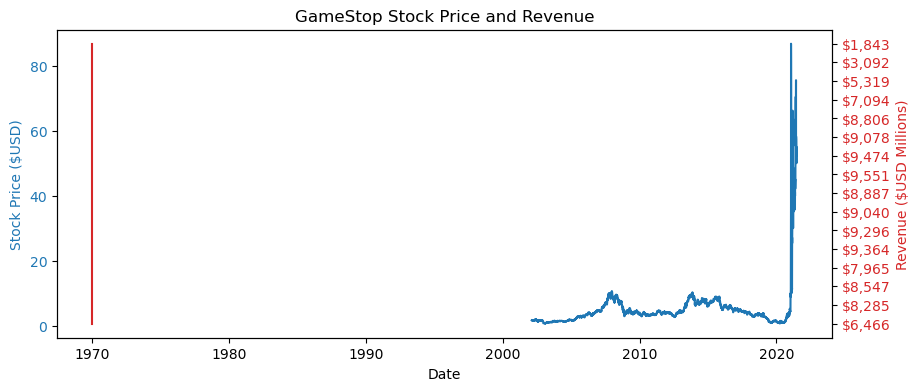

In [ ]:
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data = gme_data[gme_data['Date'] <= '2021-06-30']
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']
make_graph(gme_data, gme_revenue, 'GameStop')